__Resources__<br>
I will be using numpy pandas matplotlib and citipy packages and the open weather wrapper

In [61]:
#import dependencies
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests as req
import json
import time
import os
from config import opwther_key
sample_out = "SampleCoords.csv"
import datetime


now = datetime.date.today()

data_file = "sample_data"


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
appid = opwther_key
settings = {"units": "imperial", "appid":opwther_key}
query_url = f"{url}appid={opwther_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=


__ Gathering Random City Samples__<br>
I will accomplish this by retreiving a city list from citipy by iterating through latitude and longitude<br>
values and retreiving city names where there are matches using the citipy nearest_city function.<br>
This will create duplicates that will be removed before sampling. <br>
The latitude and longitude values will include the entire globe.<br>
I chose to sample the globe in quadrants seperately to ensure even distriubtion of samples<br>
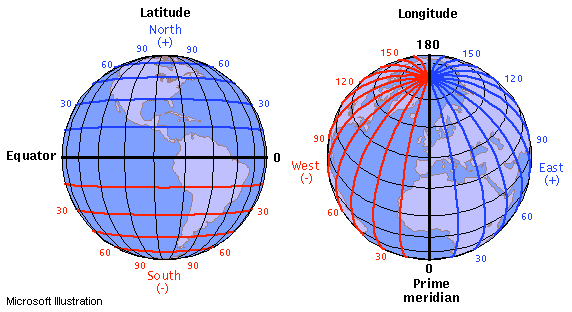<br>
Image source = http://learner.org/jnorth/tm/LongitudeIntro.html

In [9]:
#create empty list
north_citylist = []

count = 0
dup = 'no'
#cycle through lat long values
for x in range(0,90,1):
    for y in range(-180,180,1):
        city = citipy.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
         #insert first value
        if len(north_citylist) == 0:
            north_citylist.append(citdict)
            count+=1
            continue
        else:
                 #skip record if city is already in dictionary
            for city in north_citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            north_citylist.append(citdict)
            count+=1
        else:
            dup = 'no'
            
north_df = pd.DataFrame({
    'city': [x['city'] for x in north_citylist],
    'country': [x['country'] for x in north_citylist],
    'lat':[x['lat'] for x in north_citylist],
    'long':[x['long'] for x in north_citylist]})

#sample south values for 250 samples
north_sample_df= north_df.sample(250)


In [10]:
#create empty list
south_citylist =[]
count = 0
dup = 'no'
#cycle through lat long values
for x in range(-90,-1,1):
    for y in range(-180,180,1):
        # call nearest_city function from city py and append results to dictionary
        city = citipy.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        #insert first value
        if len(south_citylist) == 0:
            south_citylist.append(citdict)
            count+=1
            continue
        #skip record if city is already in dictionary
        else:
            for city in south_citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            south_citylist.append(citdict)
            count+=1
        else:
            dup = 'no'
            
south_df = pd.DataFrame({
    'city': [x['city'] for x in south_citylist],
    'country': [x['country'] for x in south_citylist],
    'lat':[x['lat'] for x in south_citylist],
    'long':[x['long'] for x in south_citylist]})

#sample south values for 250 samples
south_sample_df= south_df.sample(250)


In [11]:
#append both samples to common dataframe
city_sample_df=south_sample_df
city_sample_df=city_sample_df.append(north_sample_df)


city_sample_df.head()
#check results
print(len(city_sample_df))



500


In [12]:
city_sample_df.head()

,city,country,lat,long
1282,liwale,tz,-10,37
184,warkworth,nz,-36,175
484,bengkulu,id,-26,86
1422,ngerengere,tz,-7,38
1428,kadungora,id,-7,108


In [13]:
#Validate Sampling moethods
print("Northern Hemisphere City Totals : " + str(len(north_df)))

print("Southern Hemisphere City Totals : " + str(len(south_df)))

Northern Hemisphere City Totals : 6273
Southern Hemisphere City Totals : 1764


__ Key Differences In City Counts__<br>
There are significantly more cities in the northern hemisphere<br>
This validates my sampling method of splitting and joining the samples.<br>




In [14]:
count = 0
weather_json = []

for index,row in city_sample_df.iterrows():
    count+= 1
    query_url = url + "appid=" + opwther_key + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
        weather_json.append(cityweather)
        city1 = data.get("name")
        city.append(city1)
        country1 = data.get("sys").get("country")
        country.append(country1)
    except:
        #print(f"No data for this city: {row['city']}")
        print(f"Processing Record {count} for {row['city']} , {row['country']}")

        print(query_url)

print("                Data Retrieval Complete")


Processing Record 1 for liwale , tz
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=liwale
Processing Record 2 for warkworth , nz
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=warkworth
Processing Record 3 for bengkulu , id
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=bengkulu
Processing Record 4 for ngerengere , tz
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=ngerengere
Processing Record 5 for kadungora , id
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=kadungora
Processing Record 6 for conchas , br
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=conchas
Processing Record 7 for capitan bado , py
http://api.openweathermap.org/data/2.5/weather?appid=f5b

Processing Record 56 for abancay , pe
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=abancay
Processing Record 57 for nyamuswa , tz
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=nyamuswa
Processing Record 58 for aguas formosas , br
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=aguas formosas
Processing Record 59 for iquitos , pe
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=iquitos
Processing Record 60 for palabuhanratu , id
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=palabuhanratu
Processing Record 61 for namanyere , tz
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=namanyere
Processing Record 62 for madimba , tz
http://api.openweathermap.org/data/2

Processing Record 110 for gambiran , id
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=gambiran
Processing Record 111 for canavieiras , br
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=canavieiras
Processing Record 112 for kindu , cd
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=kindu
Processing Record 113 for chiredzi , zw
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=chiredzi
Processing Record 114 for bambanglipuro , id
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=bambanglipuro
Processing Record 115 for monteagudo , bo
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=monteagudo
Processing Record 116 for voh , nc
http://api.openweathermap.org/data/2.5/

Processing Record 165 for yauya , pe
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=yauya
Processing Record 166 for graneros , cl
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=graneros
Processing Record 167 for sao raimundo nonato , br
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=sao raimundo nonato
Processing Record 168 for pitimbu , br
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=pitimbu
Processing Record 169 for richards bay , za
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=richards bay
Processing Record 170 for sola , vu
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=sola
Processing Record 171 for machali , cl
http://api.openweathermap.org/data/

Processing Record 218 for lumajang , id
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=lumajang
Processing Record 219 for nkayi , cg
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=nkayi
Processing Record 220 for arraias , br
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=arraias
Processing Record 221 for posse , br
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=posse
Processing Record 222 for buala , sb
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=buala
Processing Record 223 for kilosa , tz
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=kilosa
Processing Record 224 for grand gaube , mu
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759

Processing Record 272 for zhengjiatun , cn
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=zhengjiatun
Processing Record 273 for west odessa , us
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=west odessa
Processing Record 274 for bandarbeyla , so
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=bandarbeyla
Processing Record 275 for chor , pk
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=chor
Processing Record 276 for fort smith , us
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=fort smith
Processing Record 277 for san onofre , co
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=san onofre
Processing Record 278 for russkiy , ru
http://api.openweathermap.org/d

Processing Record 326 for bonga , et
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=bonga
Processing Record 327 for decatur , us
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=decatur
Processing Record 328 for quetta , pk
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=quetta
Processing Record 329 for purgstall , at
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=purgstall
Processing Record 330 for astipalaia , gr
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=astipalaia
Processing Record 331 for havelock , us
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=havelock
Processing Record 332 for ubinskoye , ru
http://api.openweathermap.org/data/2.5/weather?appid=

Processing Record 380 for yashkul , ru
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=yashkul
Processing Record 381 for grand centre , ca
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=grand centre
Processing Record 382 for lappeenranta , fi
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=lappeenranta
Processing Record 383 for iraray , ph
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=iraray
Processing Record 384 for tambul , sd
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=tambul
Processing Record 385 for nalut , ly
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=nalut
Processing Record 386 for galbshtadt , ru
http://api.openweathermap.org/data/2.5/weather

Processing Record 434 for rosetown , ca
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=rosetown
Processing Record 435 for kadyy , ru
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=kadyy
Processing Record 436 for khandagayty , ru
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=khandagayty
Processing Record 437 for vengerovo , ru
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=vengerovo
Processing Record 438 for ashtabula , us
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=ashtabula
Processing Record 439 for navahrudak , by
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=navahrudak
Processing Record 440 for teseney , er
http://api.openweathermap.org/data/2.5/we

Processing Record 488 for yusva , ru
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=yusva
Processing Record 489 for constitucion , mx
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=constitucion
Processing Record 490 for ajaccio , fr
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=ajaccio
Processing Record 491 for kirchzarten , de
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=kirchzarten
Processing Record 492 for voyvozh , ru
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=voyvozh
Processing Record 493 for alamogordo , us
http://api.openweathermap.org/data/2.5/weather?appid=f5b7d2d713e23759aa5edd5604694c1e&units=imperial&q=alamogordo
Processing Record 494 for sukhothai , th
http://api.openweathermap.org/data/2.5/

In [18]:

latitude  = []
longtitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
city = []
country = []
max_temp = []


for data in weather_json:
    try:

        lat1 = data.get("coord").get("lat")
        latitude.append(lat1)
        temp1 = data.get("main").get("temp")
        temperature.append(temp1)
        city1 = data.get("name")
        city.append(city1)
        country1 = data.get("sys").get("country")
        country.append(country1)
        humi1 = data.get("main").get("humidity")
        humidity.append(humi1)
        cld1 = data.get("clouds").get("all")
        cloudiness.append(cld1)
        wind1 = data.get("wind").get("speed")
        wind_speed.append(wind1)
        long1 = data.get("coord").get("lon")
        longtitude.append(long1)
        temp1 = data.get("main").get("temp_max")
        max_temp.append(temp1)
        
    except:
        pass

    continue

weather_dict = {"city":city, "Temperature (F)": temperature, "Latitude": latitude, "Longitude":longtitude, "Country":country,
                "Humidity": humidity, "Cloudiness":cloudiness,"Wind_Speed":wind_speed, "Max_Temp":max_temp}
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv(data_file+'_'+str(now)+'.csv', sep='\t')


weather_df.head()


,city,Temperature (F),Latitude,Longitude,Country,Humidity,Cloudiness,Wind_Speed,Max_Temp
0,Liwale,68.90,-9.80,37.92,TZ,73,0,4.61,68.90
1,Warkworth,50.00,-36.40,174.66,NZ,93,0,3.36,50.00
2,Ngerengere,74.75,-6.76,38.13,TZ,84,68,3.60,74.75
3,Kadungora,65.30,-7.09,107.89,ID,98,80,1.25,65.30
4,Conchas,60.62,-23.02,-48.01,BR,60,8,5.39,60.62


In [19]:
#check for sample totals
len(weather_df)

450

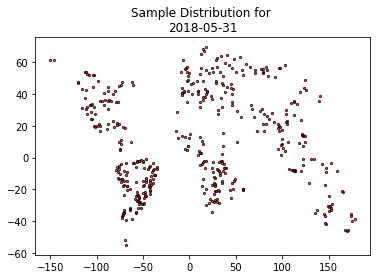

In [45]:
plt.title("Sample Distribution for \n"+str(now))
plt.scatter(weather_df.Longitude,weather_df.Latitude,facecolors="red",s=5, edgecolors="black",alpha=0.75)

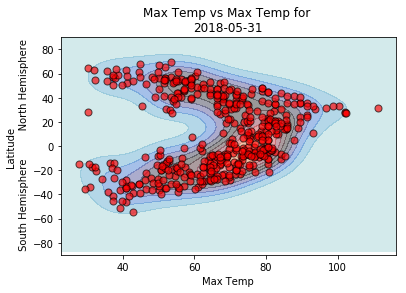

In [58]:
sns.kdeplot(weather_df.Max_Temp,weather_df.Latitude,{'axes.grid': True},cmap="icefire",alpha=0.45)
plt.scatter(weather_df.Max_Temp,weather_df.Latitude,facecolors="red",s=50, edgecolors="black",alpha=0.65)

plt.title("Max Temp vs Max Temp for \n"+str(now))
plt.xlabel("Max Temp")
plt.ylabel("Latitude \n South Hemisphere         North Hemisphere", multialignment='center')
plt.ylim((-90,90))
plt.xlim((min(weather_df.Max_Temp)-5,max(weather_df.Max_Temp)+5))


plt.savefig("Latitude V Max Temp"+'_'+str(now)+'.png')

__ Temperature V Latitude__<br>
Density and scatter plot combined in the above plot shows a clear relationship.<br>
Temperatures nearer the equator are warmer.<br>
This relationship will be expected to fluctuate.<br>



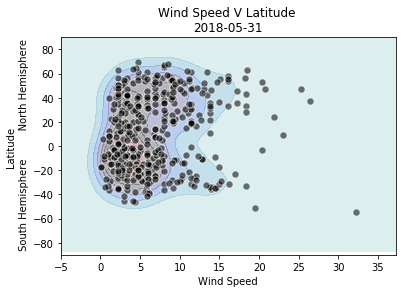

In [55]:
sns.kdeplot(weather_df.Wind_Speed,weather_df.Latitude,{'axes.grid': True},cmap="icefire",alpha=0.35)
plt.scatter(weather_df.Wind_Speed,weather_df.Latitude,facecolors="black", edgecolors="white",s=50,alpha=0.55)

plt.title("Wind Speed V Latitude \n"+str(now))
plt.xlabel("Wind Speed")
plt.ylabel("Latitude \n South Hemisphere         North Hemisphere", multialignment='center')

plt.ylim((-90,90))
plt.xlim((-5,max(weather_df.Wind_Speed)+5))


plt.savefig("Wind Speed V Latitude"+'_'+str(now)+'.png')

__Wind Speed V Latitude__<br>
In the above chart you can notice that the higher windspeeds are more common farther<br>
from the equator.


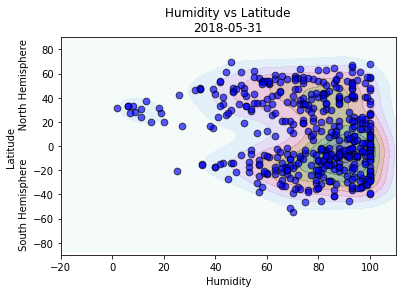

In [51]:
sns.kdeplot(weather_df.Humidity,weather_df.Latitude,{'axes.grid': True},cmap="cubehelix_r",alpha=0.45)
plt.scatter(weather_df.Humidity,weather_df.Latitude, facecolors="blue",s=45, edgecolors="black",alpha=0.65)

plt.title("Humidity vs Latitude\n"+str(now))
plt.xlabel("Humidity")
plt.ylabel("Latitude \n South Hemisphere         North Hemisphere", multialignment='center')

plt.ylim((-90,90))
plt.xlim((-20,max(weather_df.Humidity)+10))



plt.savefig("Humidity V Latitude"+'_'+str(now)+'.png')

__Humidity V Latitude__<br>
In the above chart you can notice that the higher humidities are more common closer<br>
to the equator.


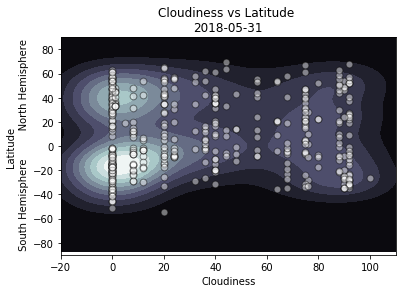

In [50]:
plt.title("Cloudiness vs Latitude \n"+str(now))
sns.kdeplot(weather_df.Cloudiness,weather_df.Latitude,{'axes.grid': True},cmap="bone")
plt.scatter(weather_df.Cloudiness,weather_df.Latitude, facecolors="White",s=45, edgecolors="black",alpha=0.45)

plt.ylabel("Latitude \n South Hemisphere         North Hemisphere", multialignment='center')

plt.ylim((-90,90))
plt.xlim((-20,max(weather_df.Cloudiness)+10))

plt.savefig("Cloudiness vs Latitude"+'_'+str(now)+'.png')


__Clouds V Latitude__<br>
In the above chart you can see that cloudy conditions are most prevalent closer<br>
to the equator.